In [99]:
# import library
import numpy as np 
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# menampilkan semua kolom
pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

In [100]:
tj = pd.read_csv('transjakarta_clean.csv')

In [101]:
tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,date,day,tapInHour,tapOutHour,duration,stopsPassed,averagePerStops
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,3500.0,3,Monday,05:21:44,06:00:53,39.150000,5,0 days 00:21:58
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,3500.0,3,Monday,05:42:44,06:40:01,57.283333,8,0 days 00:22:42
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,3500.0,3,Monday,05:59:06,06:50:55,51.816667,1,0 days 00:11:43
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,3500.0,3,Monday,05:44:51,06:28:16,43.416667,6,0 days 00:17:27
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,3500.0,3,Monday,06:17:35,06:57:03,39.466667,10,0 days 00:22:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13,2023-04-21 19:55:49,3500.0,21,Friday,18:18:37,19:55:49,97.200000,11,0 days 00:20:44
36764,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,3C_1.0,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2,2023-04-18 22:28:22,3500.0,18,Tuesday,21:52:31,22:28:22,35.850000,1,0 days 00:07:45
36765,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14,2023-04-04 13:27:25,20000.0,4,Tuesday,10:29:47,13:27:25,177.633333,2,0 days 00:27:31
36766,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34,2023-04-15 20:27:50,0.0,15,Saturday,19:59:26,20:27:50,28.400000,1,0 days 00:17:05


# **3. Data Analysis**
- Data visualization
- Insight

In [146]:
columns = [i for i in tj.columns]
nunique = [tj[i].nunique() for i in tj.columns]
dtype = [tj[i].dtype for i in tj.columns]
unique = [tj[i].unique() for i in tj.columns]

pd.set_option('display.max_colwidth', 300)
data_values = pd.DataFrame({
    'columns' : columns,
    'data type' : dtype,
    'nunique' : nunique,
    'unique' : unique
})

data_values

,columns,data type,nunique,unique
0,transID,object,36768,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615..."
1,payCardID,int64,1977,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502..."
2,payCardBank,object,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,object,1970,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj...."
4,payCardSex,object,2,"[M, F]"
5,payCardBirthDate,int64,66,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1991, 1965, 2005, 1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987, 1996, 1971, 1956, 1980, 1998, 1973, 1..."
6,corridorID,object,217,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, 3C_1.0, 1Q, 5M, M7B, 9A, 4, JAK.46, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 3B, M1, 7E, 1P, 7D, 14, BW9, JIS3, 2, JAK.15, 6N, M11, JAK.112, JAK.43B, JAK.42, 7P, JAK.36, 13B, JAK.06, JAK.14, M7, T21, 12A, 9D, 1, 3A, M8, B21, JAK.71, M3, JAK.44, 8K, ..."
7,corridorName,object,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, Cibubur - Balai Kota, Kalibata - Kuningan, Bekasi Barat - Kuningan, Rempoa - Blok M, Kampung Melayu - Tanah Abang via Cikini, BKN - Blok M, PGC 2 - Gr..."
8,direction,float64,2,"[1.0, 0.0]"
9,tapInStops,object,2508,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B00243P, B00795P, B05781P, B05433P, P00254, P00281, P00159, B00608P, B05291P, P00096, B00058P, P00093, B00722P, P00206, B02144P, P00259, B02335P, B05023P, P00233, B05833P, B06299P, B06040P, P00183, B00001P, B02831P, B00102P, P00039, P00128, B0..."


There's not much we can do with these data because of the variety, columns with nunique that is too big can not be used to make a graph, and even if we forced so, it will not be insightful. So we will try to make every graph we can from the data available, those that have a small nunique value like payCardBank, payCardsex, payCardBirthDate, Corridor, payAmount, date, day, and duration

### **Data Visualization**

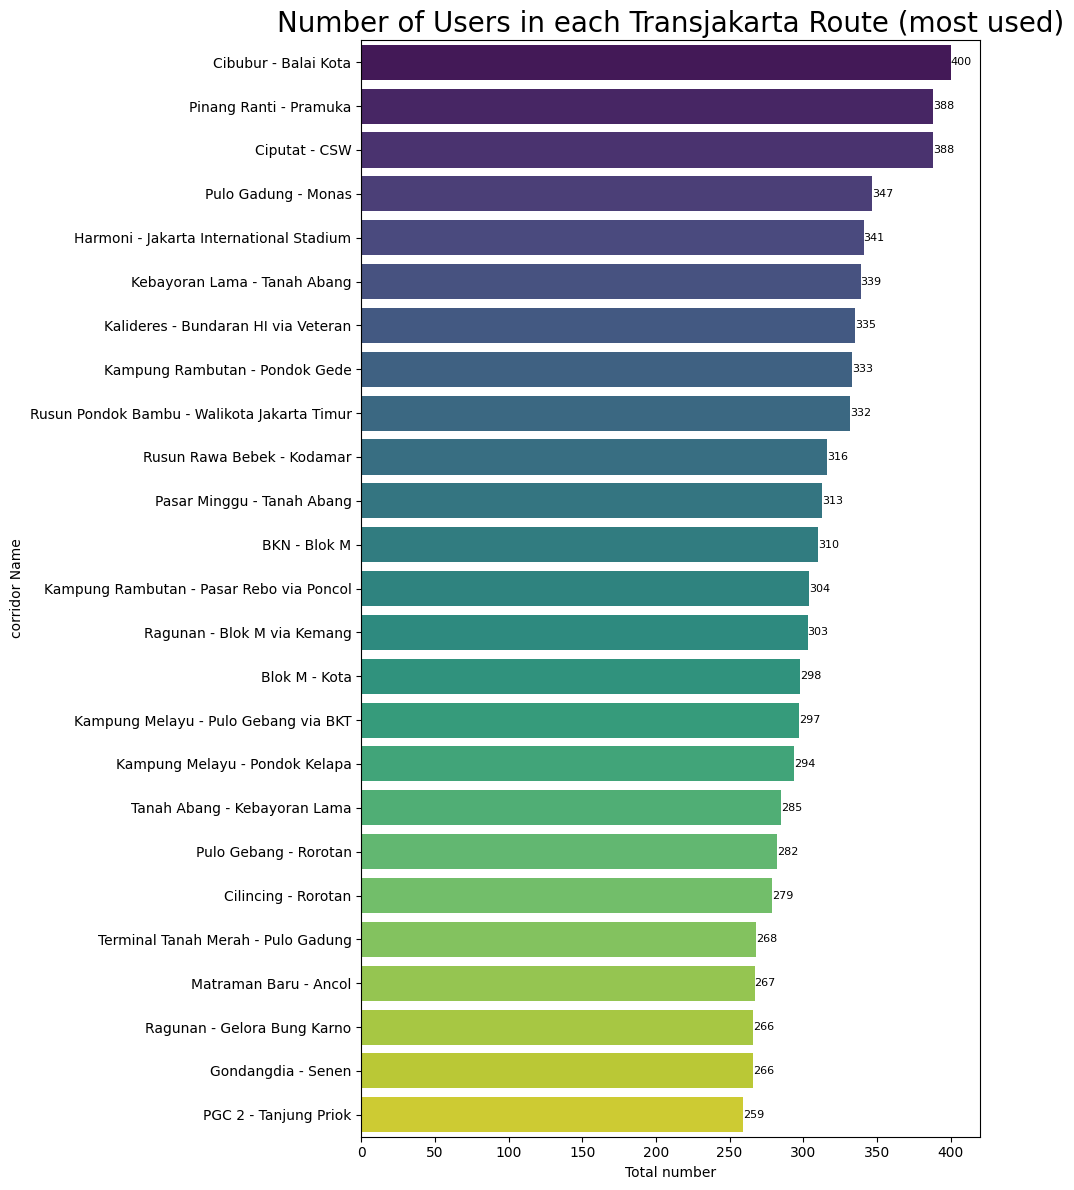

In [147]:
tjCorridor = tj['corridorName'].value_counts().sort_values(ascending=False).head(25)

# Creating bar chart
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=tjCorridor.values, y=tjCorridor.index, palette='viridis')

# Function for annotating bar chart
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_width(), bar.get_y() + bar.get_height() / 2
        ax.text(
            x, y, f'{bar.get_width():,.0f}', 
            va='center', ha='left', color='black', fontsize=8
        )
    return ax


# Adding title and labels
plt.title('Number of Users in each Transjakarta Route (most used)', fontsize=20, loc = 'center')
plt.xlabel('Total number')
plt.ylabel('corridor Name')

# Displaying bar chart
annotate_bars(ax)
plt.tight_layout()
plt.show()

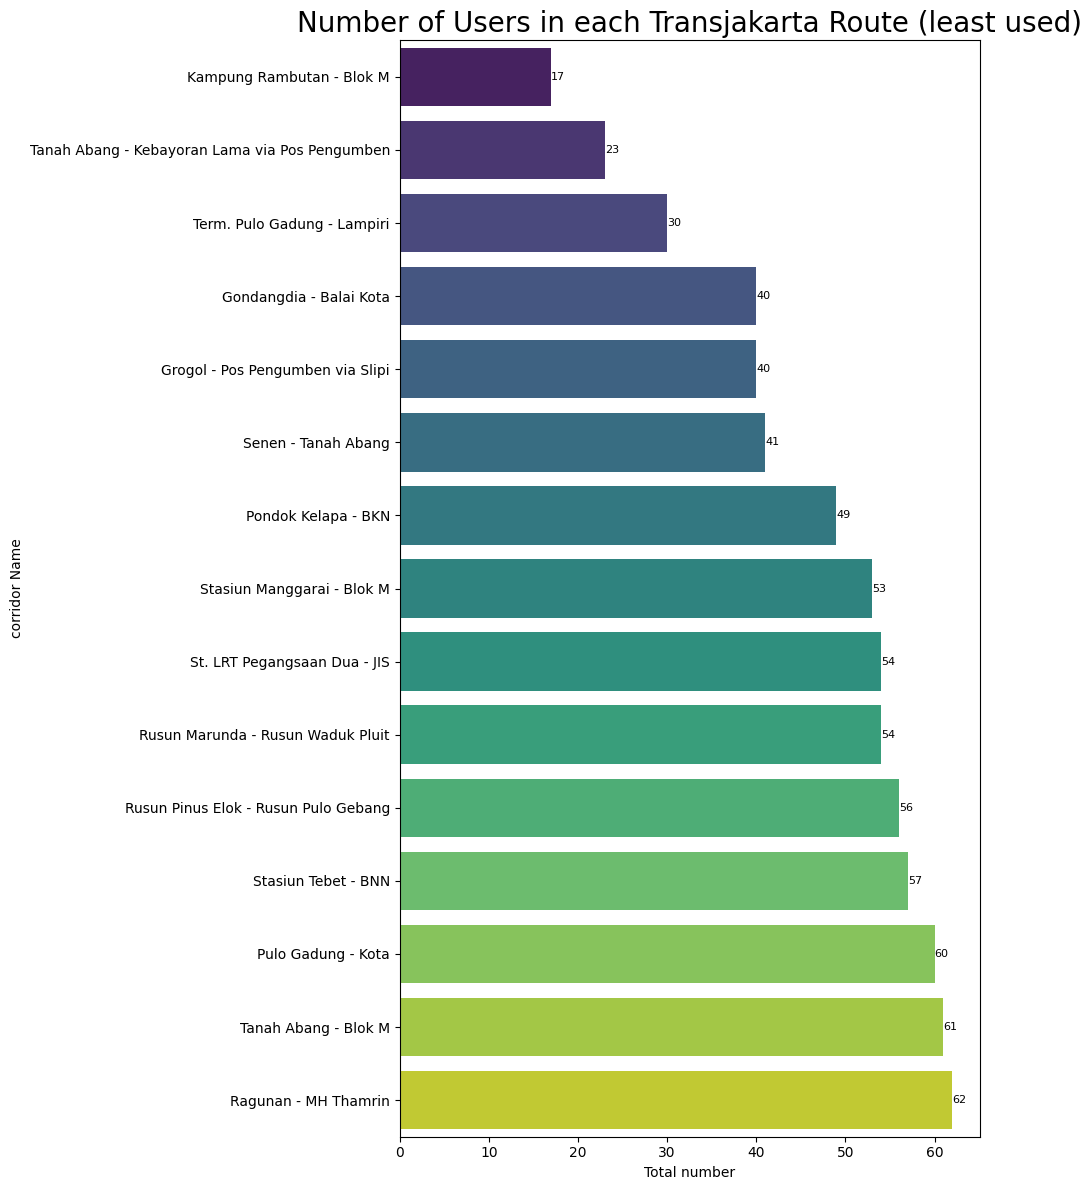

In [103]:
tjCorridor = tj['corridorName'].value_counts().sort_values(ascending=True).head(15)

# Creating bar chart
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=tjCorridor.values, y=tjCorridor.index, palette='viridis')

# Function for annotating bar chart
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_width(), bar.get_y() + bar.get_height() / 2
        ax.text(
            x, y, f'{bar.get_width():,.0f}', 
            va='center', ha='left', color='black', fontsize=8
        )
    return ax


# Adding title and labels
plt.title('Number of Users in each Transjakarta Route (least used)', fontsize=20)
plt.xlabel('Total number')
plt.ylabel('corridor Name')

# Displaying bar chart
annotate_bars(ax)
plt.tight_layout()
plt.show()

### **Insight**
**Route Optimization**

Challenge: Identifying the most and least used Transjakarta routes.

Goal: Optimize resource allocation by potentially increasing services on popular routes and reviewing the necessity of less-used routes.

There doesn't seem to be an a hugely pupular and crowded route as seen with the graph above, it seems like the route from the 25 most used routes only gradually decrease by each rank, there's not one that highly different or wildly crowded. But the least crowded is different the 3 least used route differs largely from the other's above, this route could be more optimized.

* Reccomendation: The data currently does not mention how many bus occupy each route, this should be included so we can see how optimized is each route, the least used one's could have only 1 bus so that it might not be a waste of resources, and the most used routes could have 50 bus that makes it not optimized

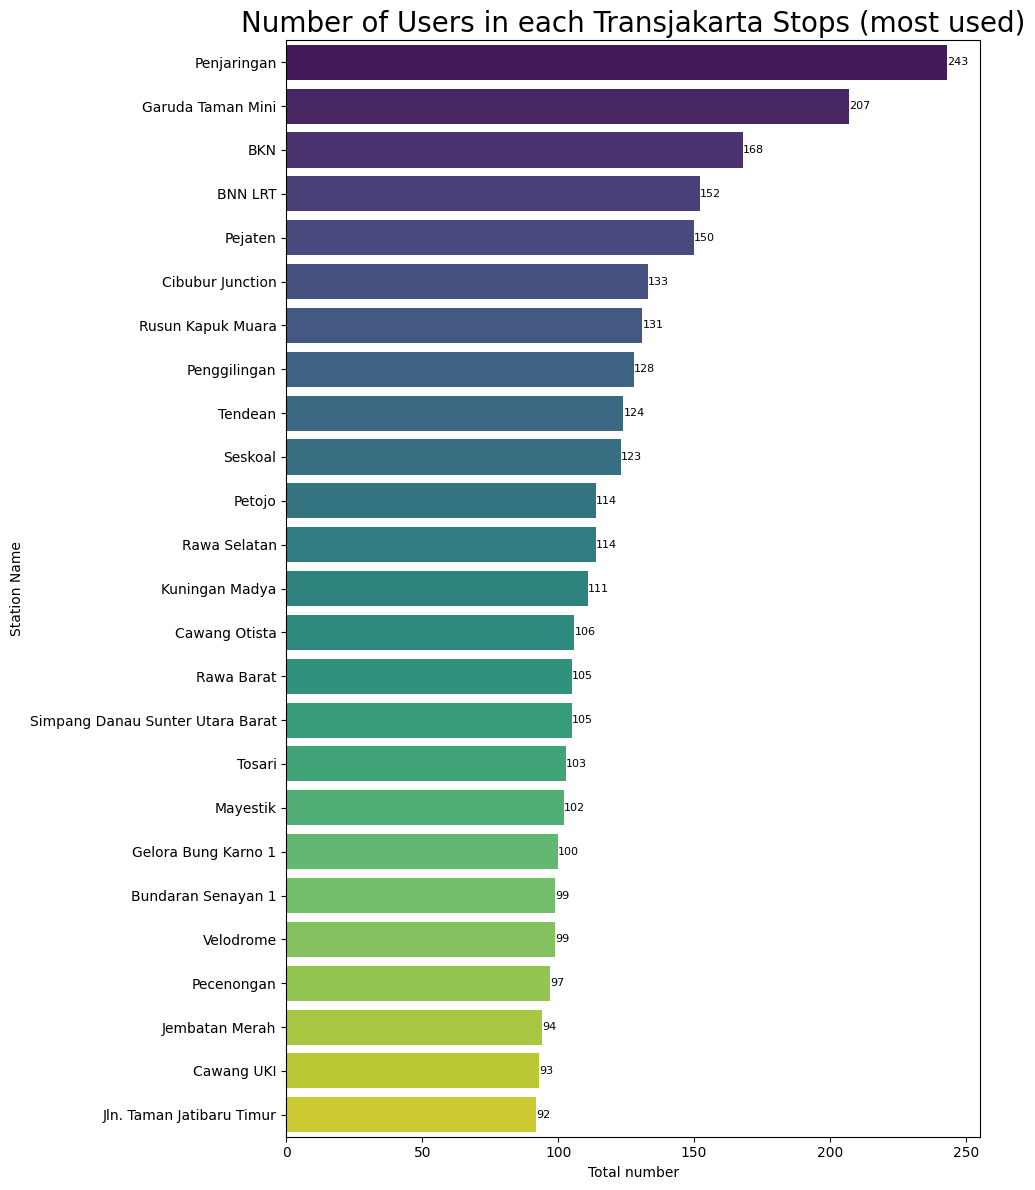

In [148]:
tjCorridor = tj['tapInStopsName'].value_counts().sort_values(ascending=False).head(25)

# Creating bar chart
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=tjCorridor.values, y=tjCorridor.index, palette='viridis')

# Function for annotating bar chart
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_width(), bar.get_y() + bar.get_height() / 2
        ax.text(
            x, y, f'{bar.get_width():,.0f}', 
            va='center', ha='left', color='black', fontsize=8
        )
    return ax


# Adding title and labels
plt.title('Number of Users in each Transjakarta Stops (most used)', fontsize=20, loc = 'center')
plt.xlabel('Total number')
plt.ylabel('Station Name')

# Displaying bar chart
annotate_bars(ax)
plt.tight_layout()
plt.show()

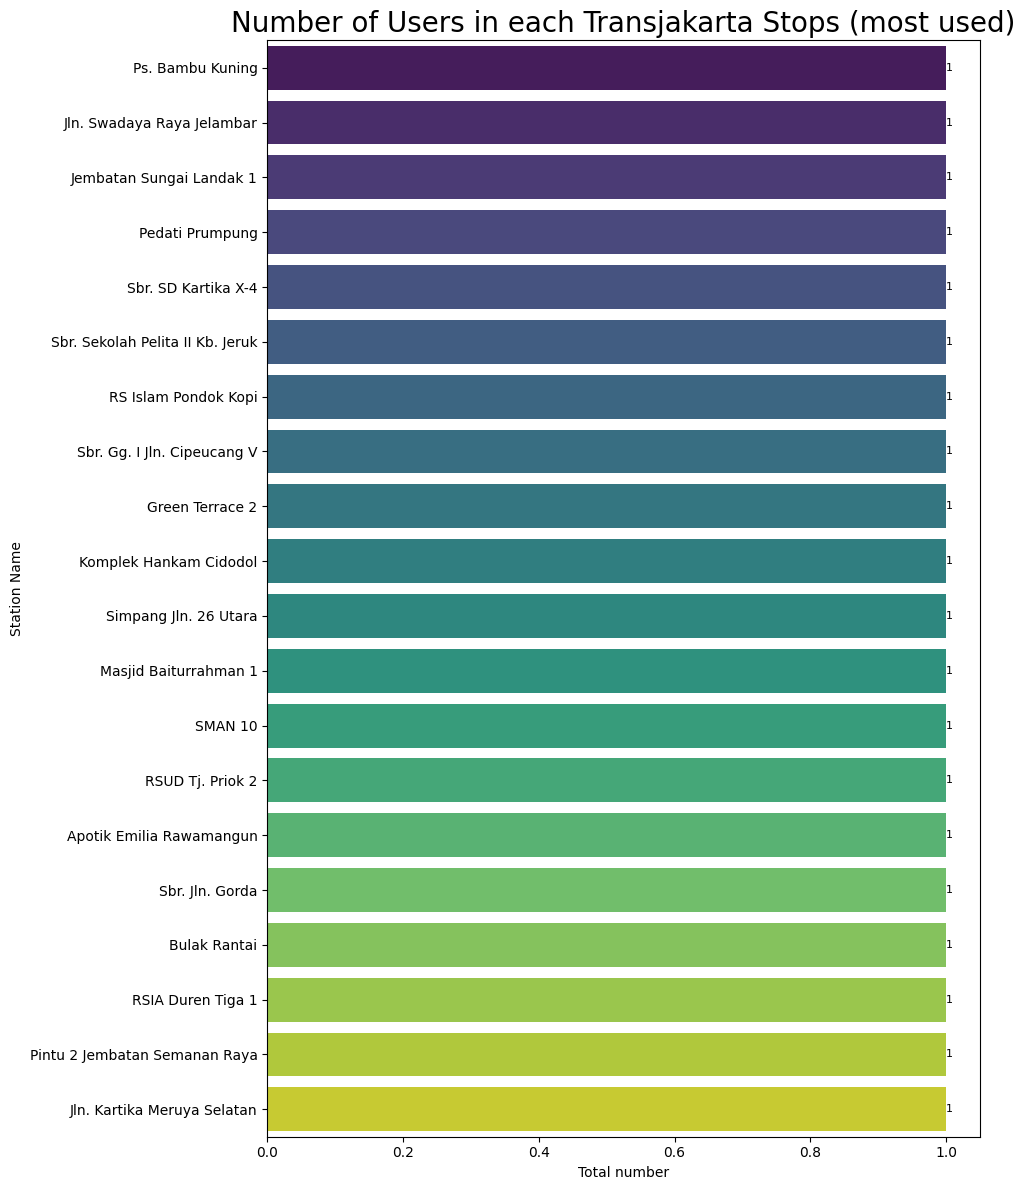

In [150]:
tjCorridor = tj['tapInStopsName'].value_counts().sort_values(ascending=False).tail(20)

# Creating bar chart
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=tjCorridor.values, y=tjCorridor.index, palette='viridis')

# Function for annotating bar chart
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_width(), bar.get_y() + bar.get_height() / 2
        ax.text(
            x, y, f'{bar.get_width():,.0f}', 
            va='center', ha='left', color='black', fontsize=8
        )
    return ax


# Adding title and labels
plt.title('Number of Users in each Transjakarta Stops (most used)', fontsize=20, loc = 'center')
plt.xlabel('Total number')
plt.ylabel('Station Name')

# Displaying bar chart
annotate_bars(ax)
plt.tight_layout()
plt.show()

In [157]:
data_halte_count = pd.pivot_table(data = tj,
               index = ['corridorName','tapInStops','tapInStopsName'],
               values = 'tapInStopsLat',
               aggfunc= 'count').sort_values(by=['tapInStops']).reset_index().rename(columns={'tapInStopsLat': 'used'}).sort_values('used', ascending = False)

data_halte_count

,corridorName,tapInStops,tapInStopsName,used
3035,Pinang Ranti - Pramuka,P00064,Garuda Taman Mini,167
1582,Rusun Kapuk Muara - Penjaringan,B03277P,Rusun Kapuk Muara,131
3329,Rusun Kapuk Muara - Penjaringan,P00170,Penjaringan,116
173,Cibubur - BKN,B00248P,Cibubur Junction,87
2093,Harmoni - Jakarta International Stadium,B04789P,Simpang Danau Sunter Utara Barat,86
...,...,...,...,...
14,Kampung Melayu - Ragunan,B00035P,Ampera 1,1
13,Pasar Minggu - Velbak,B00035P,Ampera 1,1
12,Kalibata - Kuningan,B00034P,Allianz,1
10,Pulo Gebang - Pulo Gadung 2 via PIK,B00031P,Al Wathoniyah 1,1


In [158]:
sum_of_unique_values = data_halte_count.groupby('used')['used'].sum()
print(sum_of_unique_values)

used
1      1586
2       542
3       114
4        52
5        15
       ... 
86       86
87       87
116     116
131     131
167     167
Name: used, Length: 61, dtype: int64


### **Insight**
**Stop Utilization**

Challenge: Understanding which Transjakarta stops are most frequently used.

Goal: Improve infrastructure and services at high-traffic stops to enhance passenger experience.

We can see that one stops actually have as many as 243 users, which is almost as many as a whole route on the top 25 routes. this stops is so widely used that we can be sure that this stop is either close to a lot of homes, or close to a busy location in Jakarta such as Business District or Vacation destination. as for the least used, there's more than 1500 stops that is only used once, we cannot truly make any accurate assumption for these stops because the data spread is just too wide, with more than 3.600 different stops while the total rows of data we have is only 36.000 data point. But for those stops with lots of usage, we can for sure know that they are a very crowded station. Because these stops is utilized so much, we can be sure to improve the conditions and infrastructures of these stop to give a better Transjakarta usage experience to a lost of people. 

reccomendation: to get any insightful detail about the stops, we need more data because there's just too much unique stops point.

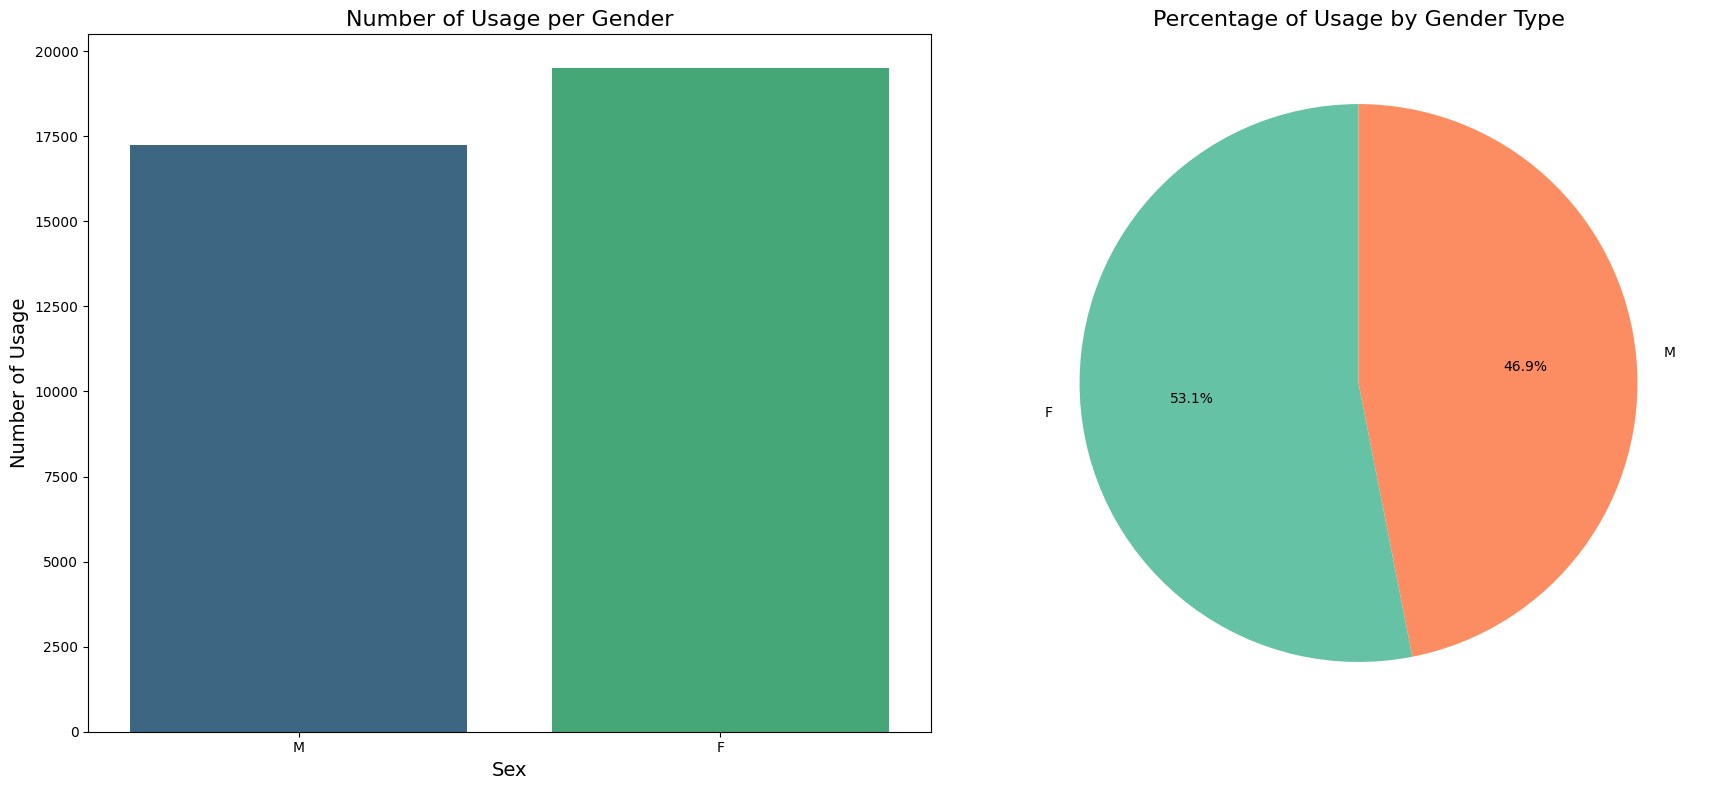

In [106]:
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Seaborn countplot on the first subplot (ax1)
sns.countplot(tj, x='payCardSex', palette='viridis', ax=ax1)
ax1.set_xlabel('Sex', fontsize=14)
ax1.set_ylabel('Number of Usage', fontsize=14)
ax1.set_title('Number of Usage per Gender', fontsize=16)

# Second plot: Pie chart on the second subplot (ax2)
gender_counts = tj['payCardSex'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
ax2.set_title('Percentage of Usage by Gender Type', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### **Insight**
**Demographic Analysis**

Challenge: Analyzing usage patterns based on gender and age (birth decade).

Goal: Tailor services and marketing strategies to cater to the primary user demographics.

Based on just gender, there doesn't seems to be a huge difference in the usage of Transjakarta for Male and Female, there doesn't seems to be a need to prioritize getting more gender to use Transjakarta over the other right now.

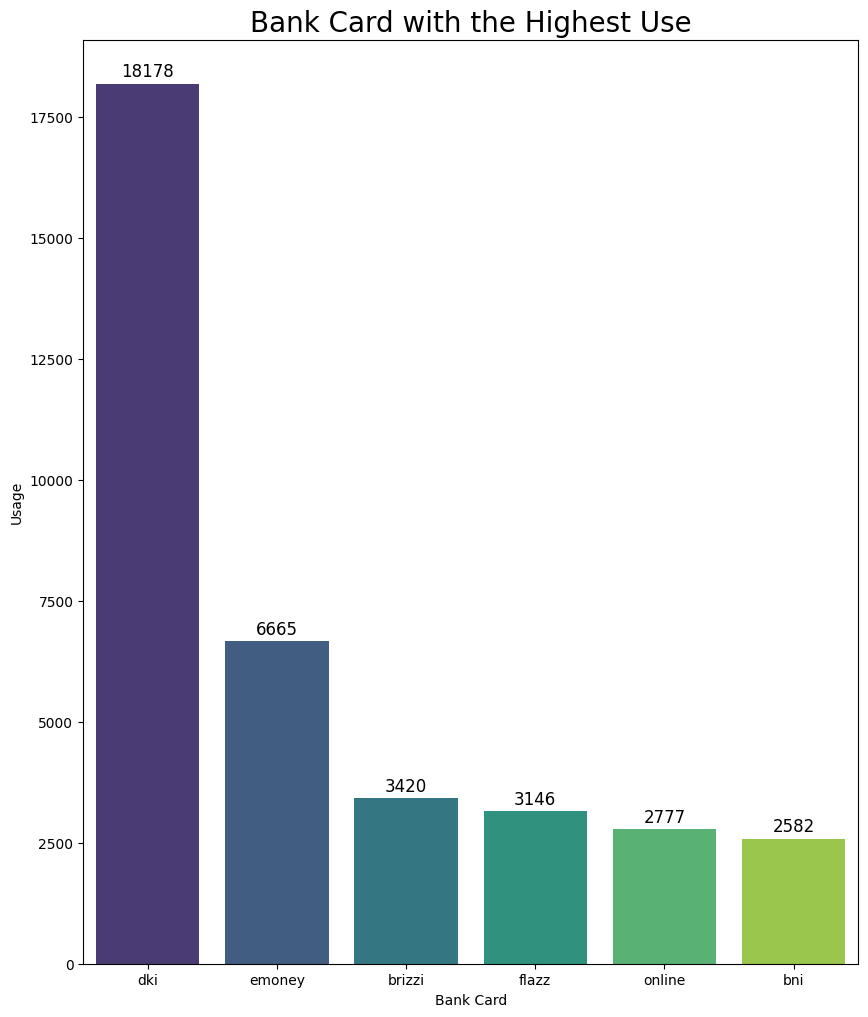

In [107]:
sorted_order = tj['payCardBank'].value_counts().index

plt.figure(figsize=(10, 12))
ax = sns.countplot(tj, x ='payCardBank', palette='viridis', order=sorted_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')  
    
plt.title('Bank Card with the Highest Use', loc = 'center', fontsize=20)
plt.xlabel('Bank Card')
plt.ylabel('Usage')
# plt.legend(login['Customer_Login_type'])
#plt.xticks(rotation = (90))
plt.show()

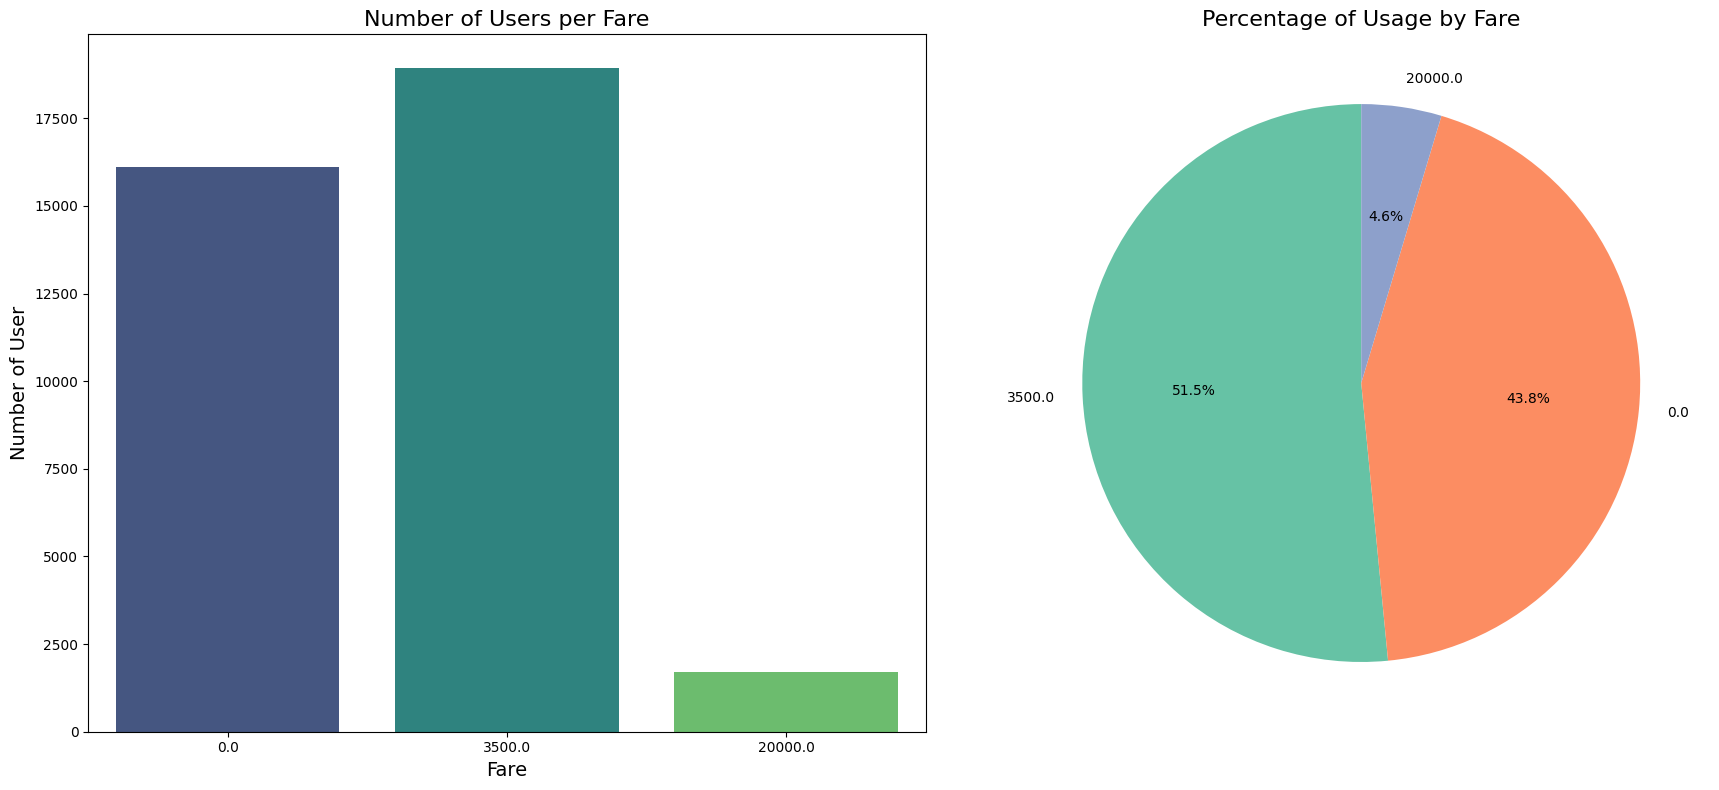

In [108]:
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Seaborn countplot on the first subplot (ax1)
sns.countplot(tj, x='payAmount', palette='viridis', ax=ax1)
ax1.set_xlabel('Fare', fontsize=14)
ax1.set_ylabel('Number of User', fontsize=14)
ax1.set_title('Number of Users per Fare', fontsize=16)

# Second plot: Pie chart on the second subplot (ax2)
gender_counts = tj['payAmount'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
ax2.set_title('Percentage of Usage by Fare', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The reason there are three different prices for Transjakarta is because of the RoyalTrans route, which serves less-used locations with higher-quality buses, thus charging a premium. Additionally, Jakarta has a program that offers free rides on Transjakarta for those who meet certain conditions. If you fulfill one of the following conditions, you can obtain a special card for free rides on Transjakarta:

Penerima Layanan Gratis dengan kartu Jakcard Combo meliputi golongan-golongan berikut: 

1. Pegawai Negeri Sipil Pemprov DKI Jakarta dan pensiunannya;
2. Tenaga Kontrak yang bekerja di Pemprov DKI;
3. Pemilik Kartu Jakarta Pintar (KJP);
4. Karyawan Swasta tertentu/Pekerja (Gaji sesuai UMP melalui Bank DKI);
5. Penghuni Rumah Susun Sederhana Sewa;
6. Tim Penggerak Pemberdayaan dan Kesejahteraan Keluarga.

Keenam golongan penerima Layanan Gratis dengan Jakcard Combo tersebut dapat melakukan pendaftaran program dengan menghubungi Bank DKI. 

Sementara itu, berikut penerima Layanan Gratis dengan TJ Card: 

1. Lanjut usia 60 tahun ke atas (lansia);
2. Penyandang disabilitas;
3. Anggota Veteran Republik Indonesia;
4. Penerima Raskin (pemilik Kartu Keluarga Sejahtera);
5. Penduduk pemilik KTP Kepulauan Seribu;
6. Pengurus masjid (marbot);
7. Pendidik dan tenaga Pendidikan Anak Usia Dini (PAUD);
8. Larva monitor;
9. Anggota TNI/Polri. 

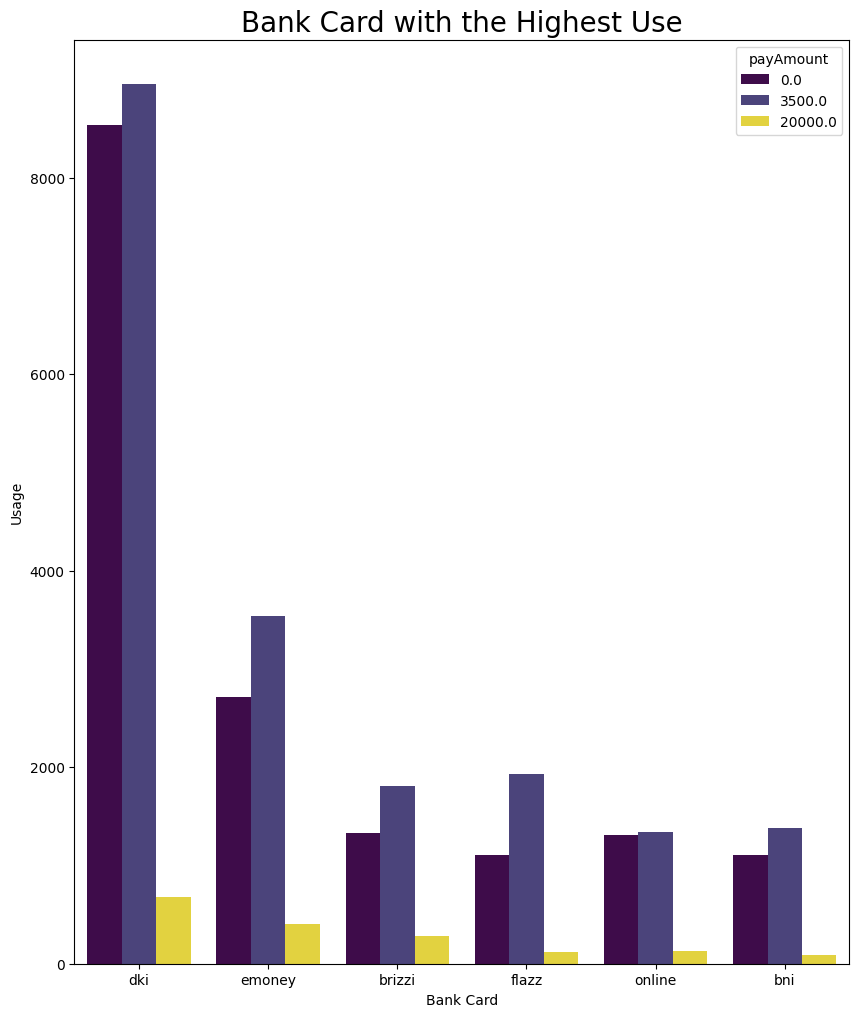

In [109]:
plt.figure(figsize=(10, 12))
sns.countplot(tj, x ='payCardBank', palette='viridis', hue = 'payAmount', order=sorted_order)
plt.title('Bank Card with the Highest Use', loc = 'center', fontsize=20)
plt.xlabel('Bank Card')
plt.ylabel('Usage')
plt.show()

**Payment System Efficiency**

Challenge: Identifying the most popular bank cards and analyzing fare distribution.

Goal: Streamline payment processes and potentially negotiate better terms with frequently used banks.

The DKI Bank card is highly more used that the other cards because they are the only bank that could release JakCard which gives free rides to those that fulfill one of 6 conditions, the other Bank Card could also offer free rides with TJ card for those that fullfil 9 other conditions but the 6 conditions offered by DKI card already covered most of the users while the additional 9 conditions is only for those not covered by these 6 and so the number is less.

We could see that Government project to give free rides is highly successfull seeing almost half of the users is already a free users.

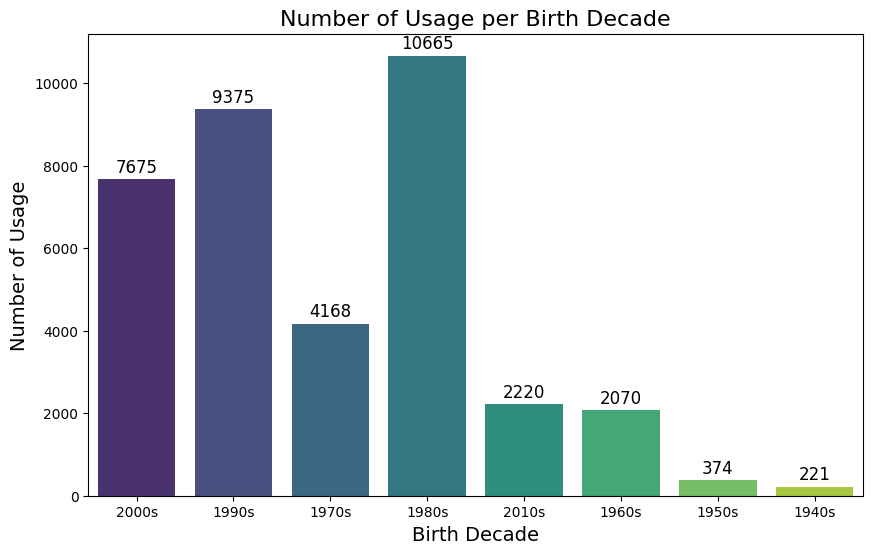

In [110]:
tj['BirthDecade'] = (tj['payCardBirthDate'] // 10) * 10
tj['BirthDecade'] = tj['BirthDecade'].astype(str) + 's'

# Plot the countplot grouped by decade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='BirthDecade', data=tj, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
plt.xlabel('Birth Decade', fontsize=14)
plt.ylabel('Number of Usage', fontsize=14)
plt.title('Number of Usage per Birth Decade', fontsize=16)

# Show plot
plt.show()

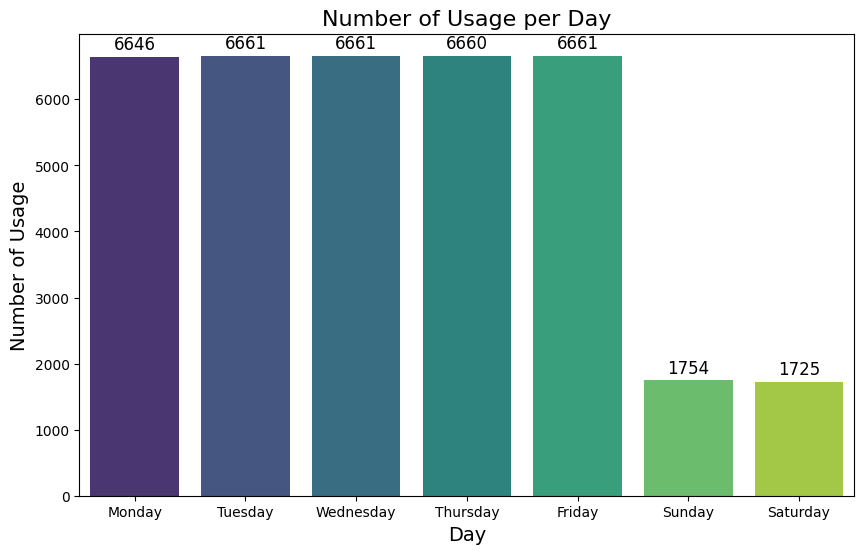

In [111]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day', data=tj, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Usage', fontsize=14)
plt.title('Number of Usage per Day', fontsize=16)

# Show plot
plt.show()

In [112]:
# Convert 'tapInHour' to datetime and extract hours
tj['tapInHour'] = pd.to_datetime(tj['tapInHour'], format='%H:%M:%S').dt.hour
hour_counts = tj['tapInHour'].value_counts().sort_index()

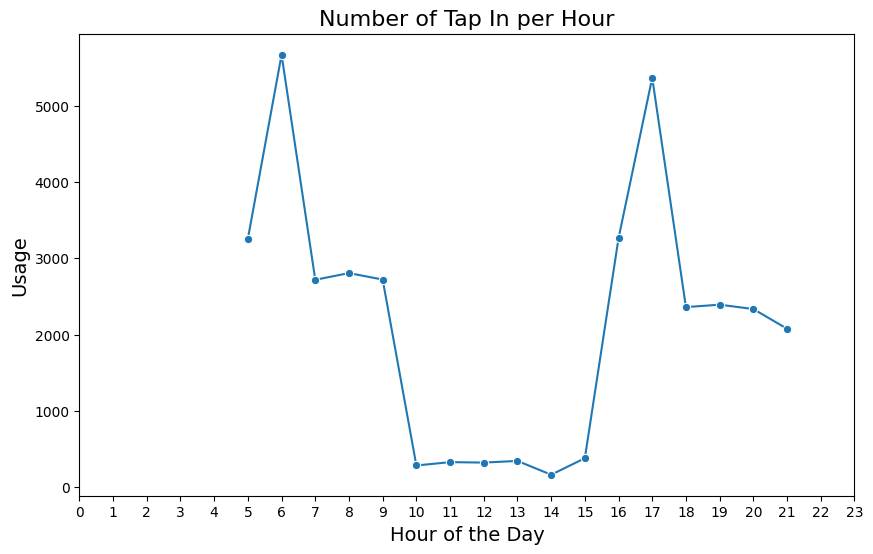

In [121]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o',palette='viridis')

# Set labels and title
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Usage', fontsize=14)
plt.xticks(ticks=range(0, 24, 1))
plt.title('Number of Tap In per Hour', fontsize=16)

# Show plot
plt.show()

In [114]:
# Convert 'tapOutHour' to datetime and extract hours
tj['tapOutHour'] = pd.to_datetime(tj['tapOutHour'], format='%H:%M:%S').dt.hour
hour_counts2 = tj['tapOutHour'].value_counts().sort_index()

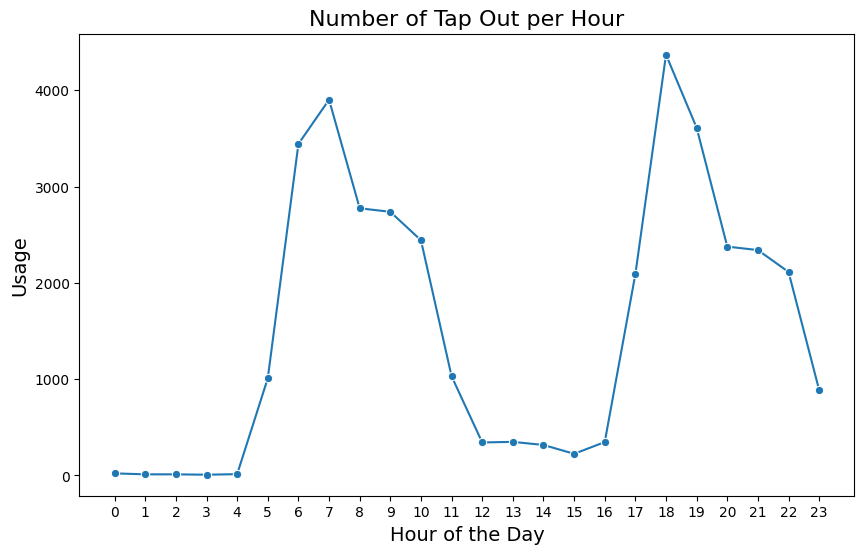

In [120]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_counts2.index, y=hour_counts2.values, marker='o',palette='viridis')

# Set labels and title
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Usage', fontsize=14)
plt.xticks(ticks=range(0, 24, 1))
plt.title('Number of Tap Out per Hour', fontsize=16)

# Show plot
plt.show()

Text(0.5, 1.0, 'Number of Tap Out per Hour')

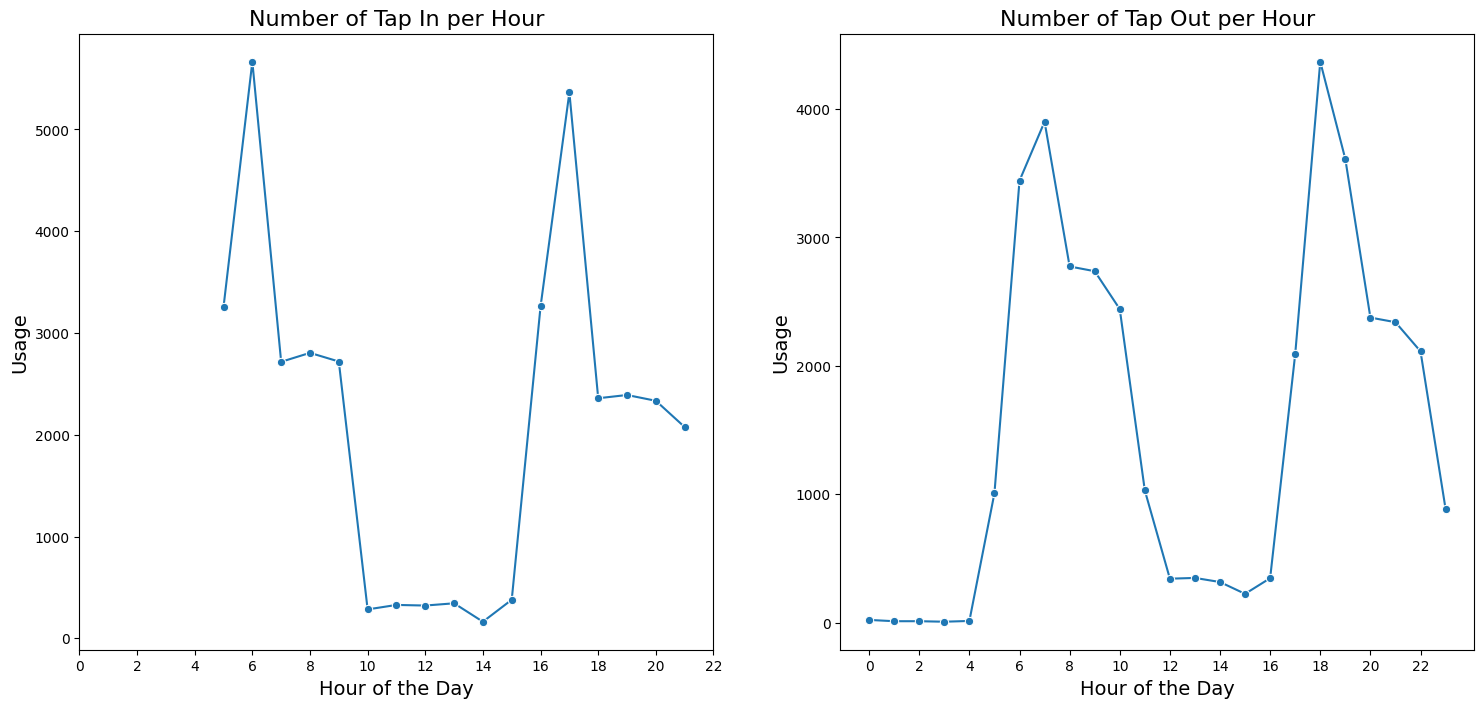

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o',palette='viridis', ax = ax1)

# Set labels and title
ax1.set_xlabel('Hour of the Day', fontsize=14)
ax1.set_ylabel('Usage', fontsize=14)
ax1.set_xticks(ticks=range(0, 24, 2))
ax1.set_title('Number of Tap In per Hour', fontsize=16)


sns.lineplot(x=hour_counts2.index, y=hour_counts2.values, marker='o',palette='viridis',ax= ax2)

# Set labels and title
ax2.set_xlabel('Hour of the Day', fontsize=14)
ax2.set_ylabel('Usage', fontsize=14)
ax2.set_xticks(ticks=range(0, 24, 2))
ax2.set_title('Number of Tap Out per Hour', fontsize=16)

In [140]:
tj['duration'] = tj['duration'].round().astype(int)
duration_counts = tj['duration'].value_counts().sort_index().head(200)

Text(0.5, 1.0, 'Duration of usage')

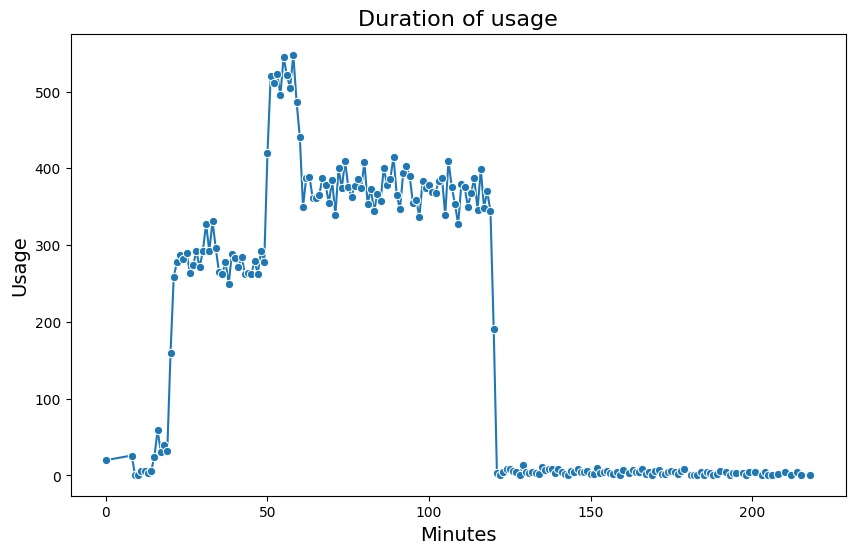

In [145]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=duration_counts.index, y=duration_counts.values, marker='o',palette='viridis')

# Set labels and title
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Usage', fontsize=14)
ax1.set_xticks(ticks=range(0, 200, 20))
plt.title('Duration of usage', fontsize=16)

### **Insight**

# **4. Conclusion and Recommendation** 

## **4.1 Conclusion**

## **4.2 Recommendation**